<a href="https://colab.research.google.com/github/akarklina/my1st/blob/main/ML_train_test_model_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import pandas as pd # data management
import matplotlib.pyplot as plt # plotting
import numpy as np # math/statistics
import sklearn as sn # machine learning

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [64]:
!pip install vaderSentiment

In [65]:
df = pd.read_csv('sentimentdataset.csv') # reading csv data file

In [66]:
df # display main dataset

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [67]:
#@title DATA CLEANING
df.shape #rows, columns

(732, 15)

In [68]:
clean_df = df.dropna() #drops every row with any missing value
clean_df.shape

(732, 15)

In [69]:
df['Sentiment'] = df['Sentiment'].apply(lambda x: x.replace(' ','')) # this takes the column 'Sentiment', then for each item in the column (x)
                                                   # (when it says lambda x: x*2), this means that it defines a function that sums 2 to the input x

In [70]:
#@title DATA EXPLORATION

sentiment_count = df.groupby('Sentiment').count().sort_values(by='Text')

In [71]:
from textblob import TextBlob # this dictionary of 'polarity' was compiled by languange scholars 'by hand'

In [72]:
TextBlob("cozy").sentiment.polarity

-0.19999999999999998

In [73]:
sentiment_count['polarity'] = np.nan

for word in sentiment_count.index:
  sentiment_count.loc[sentiment_count.index == word, 'polarity'] =  TextBlob(word).sentiment.polarity
sentiment_count

,Unnamed: 0.1,Unnamed: 0,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,polarity
Sentiment,,,,,,,,,,,,,,,
Amazement,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.000000
Adrenaline,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.000000
Appreciation,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.000000
Celebration,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.000000
Charm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gratitude,18,18,18,18,18,18,18,18,18,18,18,18,18,18,0.000000
Contentment,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0.000000
Excitement,37,37,37,37,37,37,37,37,37,37,37,37,37,37,0.000000


In [74]:
# LIST OF STOP WORDS
stop_words = set(stopwords.words('english'))

In [75]:
example_text = df.iloc[145]['Text']
result_list = []
for key, row in df.iterrows():

  example_text = row['Text']
  sentiment = row['Sentiment']

  split_word = example_text.strip().split(' ')

  split_word = [ word for word in split_word if word not in stop_words]

  n_words = len(split_word)

  polarity_list = []

  tweet_polarity = TextBlob(sentiment).sentiment.polarity

  for word in split_word:

    polarity_list.append(TextBlob(word).sentiment.polarity)


  max_polarity = max(polarity_list)
  min_polarity = min(polarity_list)

  result_dict = {'text': example_text,
                 'sentiment': sentiment,
                 'polarity':tweet_polarity,
                  'n_words' : n_words,
                 'max_pol': max_polarity ,
                  'min_pol': min_polarity,}
  result_list.append( result_dict)
result_df = pd.DataFrame(result_list)

In [76]:
split_word, polarity_list

(['Organizing',
  'virtual',
  'talent',
  'show',
  'challenging',
  'times,',
  'bringing',
  'smiles',
  "classmates'",
  'faces!'],
 [0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0])

In [77]:
result_df

,text,sentiment,polarity,n_words,max_pol,min_pol
0,Enjoying a beautiful day at the park! ...,Positive,0.227273,4,0.850000,0.0
1,Traffic was terrible this morning. ...,Negative,-0.300000,3,0.000000,-1.0
2,Just finished an amazing workout! 💪 ...,Positive,0.227273,5,0.600000,0.0
3,Excited about the upcoming weekend getaway! ...,Positive,0.227273,4,0.375000,0.0
4,Trying out a new recipe for dinner tonight. ...,Neutral,0.000000,5,0.136364,0.0
...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,0.800000,10,0.700000,0.0
728,Attending a surprise birthday party organized ...,Happy,0.800000,11,0.700000,0.0
729,Successfully fundraising for a school charity ...,Happy,0.800000,10,0.800000,0.0
730,"Participating in a multicultural festival, cel...",Happy,0.800000,9,1.000000,0.0


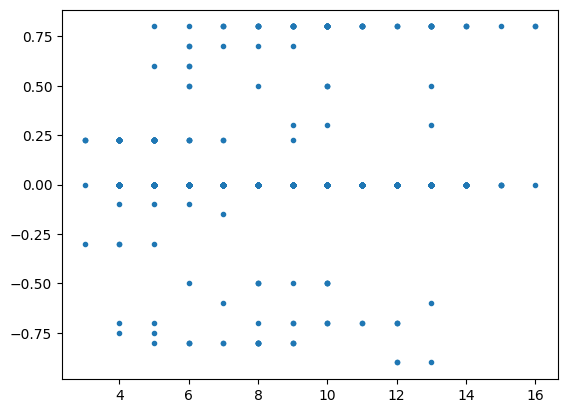

In [78]:
plt.plot(result_df['n_words'],result_df['polarity'],'.')

In [79]:
np.corrcoef(result_df['n_words'],result_df['polarity'])

array([[1.        , 0.09055709],
       [0.09055709, 1.        ]])

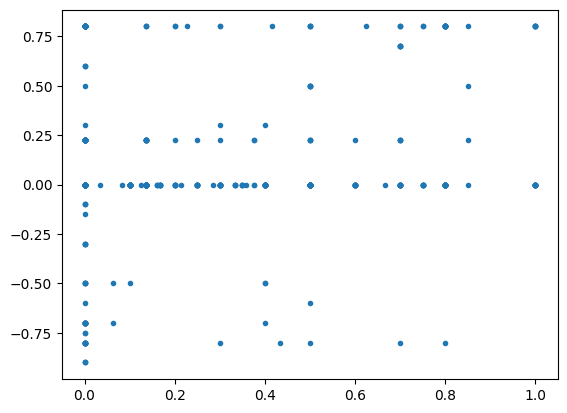

In [80]:
plt.plot(result_df['max_pol'],result_df['polarity'],'.')

In [81]:
np.corrcoef(result_df['min_pol'],result_df['polarity'])

array([[1.        , 0.40630041],
       [0.40630041, 1.        ]])

In [82]:
np.corrcoef(result_df['min_pol'],result_df['polarity'])

array([[1.        , 0.40630041],
       [0.40630041, 1.        ]])

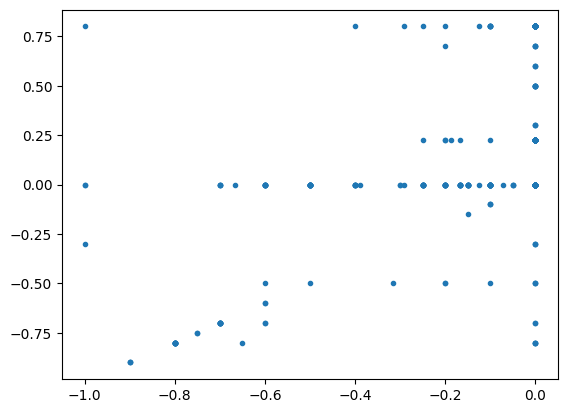

In [83]:
plt.plot(result_df['min_pol'],result_df['polarity'],'.')

In [84]:
target = 'polarity'
features = ['n_words','max_pol','min_pol']
features

['n_words', 'max_pol', 'min_pol']

In [85]:
#@title TRAIN TEST SPLIT
y = result_df[target]
X = result_df[features]

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [87]:
X_train

,n_words,max_pol,min_pol
683,8,0.0,0.00
250,10,0.8,0.00
336,5,0.0,0.00
260,10,0.0,0.00
439,7,0.0,-0.15
...,...,...,...
71,6,0.0,0.00
106,6,0.0,0.00
270,11,0.0,-0.15
435,7,0.4,0.00


In [88]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [89]:
reg.fit(X_train,y_train)

LinearRegression()

In [90]:
reg.coef_, reg.intercept_

# polarity = -0.021 + (0.00874156 * n_words ) + (0.23 * max_polarity) + (0.649 * min_polarity)

y_pred = reg.predict(X_train)

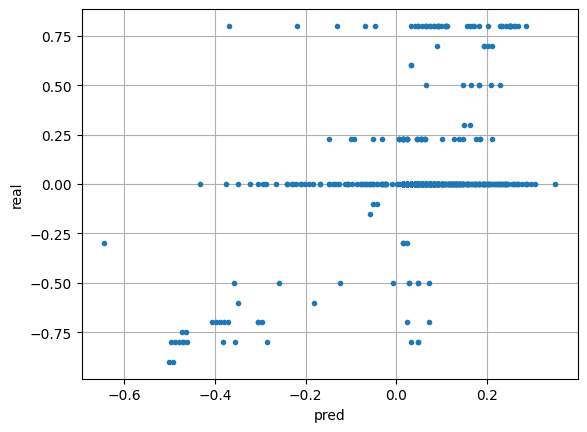

In [91]:
X_train['pred'] = y_pred
X_train['real'] = y_train
plt.plot(X_train['pred'],X_train['real'],'.')
plt.xlabel('pred')
plt.ylabel('real')
plt.grid()

In [92]:
#@title correlation between real and predicted on TRAIN
np.corrcoef(X_train['pred'], X_train['real'])

array([[1.        , 0.47358636],
       [0.47358636, 1.        ]])

In [93]:
y_test_pred = reg.predict(X_test)
X_test['pred'] = y_test_pred
X_test['real'] = y_test

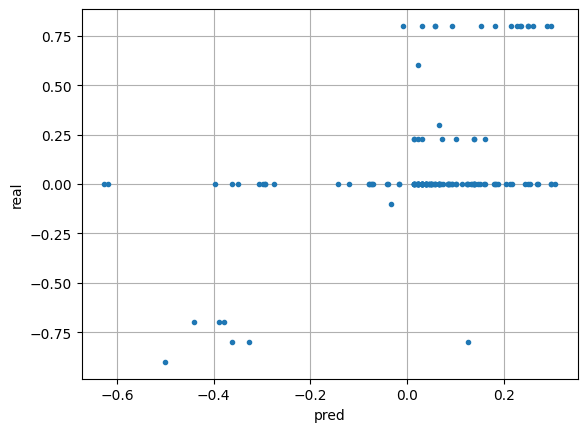

In [94]:
plt.plot(X_test['pred'], X_test['real'],'.')
plt.xlabel('pred')
plt.ylabel('real')
plt.grid()

In [95]:
#@title correlation between real and predicted on TEST
np.corrcoef(X_test['pred'], X_test['real'])

array([[1.        , 0.47021285],
       [0.47021285, 1.        ]])

In [96]:
X_test

,n_words,max_pol,min_pol,pred,real
604,12,0.136364,-0.3,-0.079665,0.000000
33,4,0.000000,0.0,0.013701,0.227273
300,12,0.000000,-0.9,-0.500745,-0.900000
457,9,0.300000,0.0,0.126696,0.000000
634,16,0.416667,0.0,0.214832,0.800000
...,...,...,...,...,...
70,5,0.100000,0.0,0.045538,0.000000
192,6,0.000000,0.0,0.031184,0.000000
328,13,0.000000,0.0,0.092375,0.000000
165,5,0.000000,0.0,0.022442,0.000000


In [97]:
cattelan_df = pd.read_csv('/content/cattelan_banana_all_articles_with_sentiment_3dec.csv')
cattelan_df

,title,date,comment,content,article_url,_source_file,Unnamed: 0,date_parsed,sentiment_title,sentiment_comment,sentiment_content
0,Maurizio Cattelan presents first new work for ...,04/12/2019,The piece of fruit taped to a wall at Art Base...,The maverick Italian artist Maurizio Cattelan...,https://www.theartnewspaper.com/2019/12/04/mau...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-04 00:00:00+00:00,0.362,0.200,0.179
1,This banana duct-taped to a wall is yours for ...,05/12/2019,"The piece, titled ""Comedian,"" is the brainchil...",Andy Warhol’s banana sent us down a slippery s...,https://nypost.com/2019/12/05/this-banana-duct...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-05 00:00:00+00:00,0.000,0.000,0.118
2,The maddening sales of Art Basel: from a duct-...,05/12/2019,Something’s rotten in the art world — and it’s...,Something’s rotten in the art world — and it’s...,https://nypost.com/2019/12/05/this-120k-banana...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-05 00:00:00+00:00,0.000,0.100,0.096
3,The Price Of This Art Is Bananas,06/12/2019,The artist Maurizio Cattelan made an artwork t...,Good morning. I'm David Greene. Like any good ...,https://www.npr.org/2019/12/06/785445107/the-p...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-06 00:00:00+00:00,0.000,0.000,0.330
4,"Is Maurizio Cattelan’s $120,000 Banana Sculptu...",06/12/2019,"At Art Basel Miami Beach, a fruit-based artwor...",At the House Judiciary Committee’s hearing on ...,https://www.artnews.com/art-news/news/maurizio...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-06 00:00:00+00:00,-0.144,0.125,0.072
...,...,...,...,...,...,...,...,...,...,...,...
95,"Justin Sun, Billionaire Buyer of Maurizio Catt...",16/07/2025,Sun keeps making headline-grabbing purchases,"Last week, crypto billionaire Justin Sun annou...",https://www.artnews.com/art-news/news/justin-s...,maurizio_cattelan_banana_articles (2).csv,NaN,2025-07-16 00:00:00+00:00,0.000,0.000,0.085
96,Someone Ate Maurizio Cattelan’s Famous Duct-Ta...,21/07/2025,"This is the fourth time the duct-taped fruit, ...",A visitor to France’s Pompidou-Metz last week ...,https://www.artnews.com/art-news/news/duct-tap...,maurizio_cattelan_banana_articles (2).csv,NaN,2025-07-21 00:00:00+00:00,0.500,0.000,0.046
97,Someone has eaten artist Maurizio Cattelan’s $...,21/07/2025,Italian artist Maurizio Cattelan’s artwork fea...,Italian artist Maurizio Cattelan’s artwork fea...,https://edition.cnn.com/2025/07/21/style/mauri...,maurizio_cattelan_banana_articles (2).csv,NaN,2025-07-21 00:00:00+00:00,0.000,0.150,0.137
98,Artist's infamous $6M banana that was duct-tap...,21/07/2025,Maurizio Cattelan’s “Comedian” has already bee...,It’s bananas! A popular and pricey piece of ar...,https://nypost.com/2025/07/21/lifestyle/mauriz...,maurizio_cattelan_banana_articles (2).csv,NaN,2025-07-21 00:00:00+00:00,-0.625,0.000,0.144


In [98]:
cattelan_df['Unnamed: 0'].unique()

array([nan])

In [99]:
catt_dict = []
for key, row in cattelan_df.iterrows():

  example_text = row['comment']
  if type(example_text)==type(np.nan):
    continue
  split_word = example_text.strip().split(' ')

  split_word = [ word for word in split_word if word not in stop_words]

  n_words = len(split_word)

  polarity_list = []

  tweet_polarity = row['sentiment_comment'] #TextBlob(sentiment).sentiment.polarity

  for word in split_word:

    polarity_list.append(TextBlob(word).sentiment.polarity)


  max_polarity = max(polarity_list)
  min_polarity = min(polarity_list)

  result_dict = {'text': example_text,
                 'polarity':tweet_polarity,
                  'n_words' : n_words,
                 'max_pol': max_polarity ,
                  'min_pol': min_polarity,}
  catt_dict.append(result_dict)

In [100]:
catt_test_df = pd.DataFrame(catt_dict)

In [101]:
y_test_pred = reg.predict(catt_test_df[features])
catt_test_df['pred'] = y_test_pred
catt_test_df

,text,polarity,n_words,max_pol,min_pol,pred
0,The piece of fruit taped to a wall at Art Base...,0.200,16,0.3,0.00,0.187887
1,"The piece, titled ""Comedian,"" is the brainchil...",0.000,19,0.0,0.00,0.144824
2,Something’s rotten in the art world — and it’s...,0.100,19,0.1,0.00,0.167920
3,The artist Maurizio Cattelan made an artwork t...,0.000,13,0.0,0.00,0.092375
4,"At Art Basel Miami Beach, a fruit-based artwor...",0.125,13,0.0,-0.25,-0.069953
...,...,...,...,...,...,...
94,Sun keeps making headline-grabbing purchases,0.000,5,0.0,0.00,0.022442
95,"This is the fourth time the duct-taped fruit, ...",0.000,10,0.0,0.00,0.066150
96,Italian artist Maurizio Cattelan’s artwork fea...,0.150,14,0.3,0.00,0.170404
97,Maurizio Cattelan’s “Comedian” has already bee...,0.000,7,0.0,0.00,0.039925


In [102]:
#@title correlation between real and predicted on CATTELAN
np.corrcoef(catt_test_df['pred'], catt_test_df['polarity'])

array([[1.        , 0.60376484],
       [0.60376484, 1.        ]])

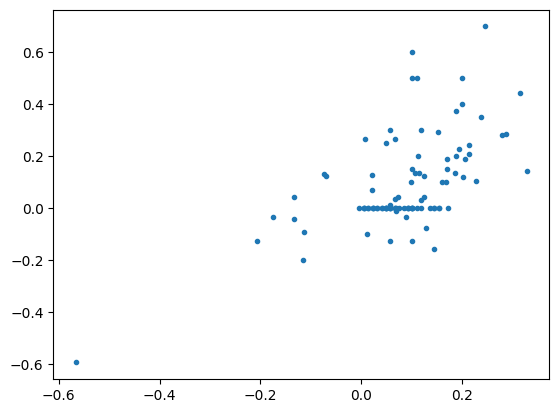

In [103]:
plt.plot(catt_test_df['pred'], catt_test_df['polarity'],'.')

In [104]:
cattelan_df

,title,date,comment,content,article_url,_source_file,Unnamed: 0,date_parsed,sentiment_title,sentiment_comment,sentiment_content
0,Maurizio Cattelan presents first new work for ...,04/12/2019,The piece of fruit taped to a wall at Art Base...,The maverick Italian artist Maurizio Cattelan...,https://www.theartnewspaper.com/2019/12/04/mau...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-04 00:00:00+00:00,0.362,0.200,0.179
1,This banana duct-taped to a wall is yours for ...,05/12/2019,"The piece, titled ""Comedian,"" is the brainchil...",Andy Warhol’s banana sent us down a slippery s...,https://nypost.com/2019/12/05/this-banana-duct...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-05 00:00:00+00:00,0.000,0.000,0.118
2,The maddening sales of Art Basel: from a duct-...,05/12/2019,Something’s rotten in the art world — and it’s...,Something’s rotten in the art world — and it’s...,https://nypost.com/2019/12/05/this-120k-banana...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-05 00:00:00+00:00,0.000,0.100,0.096
3,The Price Of This Art Is Bananas,06/12/2019,The artist Maurizio Cattelan made an artwork t...,Good morning. I'm David Greene. Like any good ...,https://www.npr.org/2019/12/06/785445107/the-p...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-06 00:00:00+00:00,0.000,0.000,0.330
4,"Is Maurizio Cattelan’s $120,000 Banana Sculptu...",06/12/2019,"At Art Basel Miami Beach, a fruit-based artwor...",At the House Judiciary Committee’s hearing on ...,https://www.artnews.com/art-news/news/maurizio...,maurizio_cattelan_banana_articles (2).csv,NaN,2019-12-06 00:00:00+00:00,-0.144,0.125,0.072
...,...,...,...,...,...,...,...,...,...,...,...
95,"Justin Sun, Billionaire Buyer of Maurizio Catt...",16/07/2025,Sun keeps making headline-grabbing purchases,"Last week, crypto billionaire Justin Sun annou...",https://www.artnews.com/art-news/news/justin-s...,maurizio_cattelan_banana_articles (2).csv,NaN,2025-07-16 00:00:00+00:00,0.000,0.000,0.085
96,Someone Ate Maurizio Cattelan’s Famous Duct-Ta...,21/07/2025,"This is the fourth time the duct-taped fruit, ...",A visitor to France’s Pompidou-Metz last week ...,https://www.artnews.com/art-news/news/duct-tap...,maurizio_cattelan_banana_articles (2).csv,NaN,2025-07-21 00:00:00+00:00,0.500,0.000,0.046
97,Someone has eaten artist Maurizio Cattelan’s $...,21/07/2025,Italian artist Maurizio Cattelan’s artwork fea...,Italian artist Maurizio Cattelan’s artwork fea...,https://edition.cnn.com/2025/07/21/style/mauri...,maurizio_cattelan_banana_articles (2).csv,NaN,2025-07-21 00:00:00+00:00,0.000,0.150,0.137
98,Artist's infamous $6M banana that was duct-tap...,21/07/2025,Maurizio Cattelan’s “Comedian” has already bee...,It’s bananas! A popular and pricey piece of ar...,https://nypost.com/2025/07/21/lifestyle/mauriz...,maurizio_cattelan_banana_articles (2).csv,NaN,2025-07-21 00:00:00+00:00,-0.625,0.000,0.144


In [105]:
cattelan_df['date'] = pd.to_datetime(cattelan_df['date_parsed'])

In [106]:
cattelan_df = cattelan_df.sort_values(by='date')

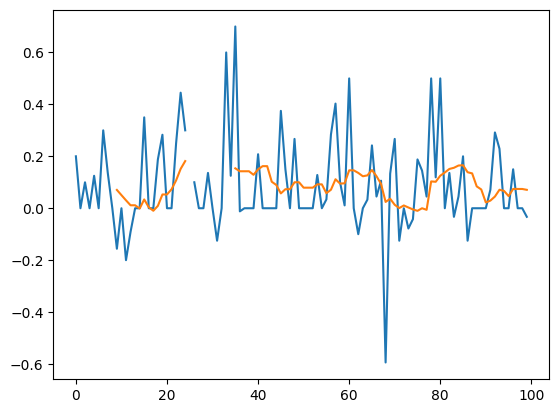

In [107]:
plt.plot(cattelan_df['sentiment_comment'].values)
plt.plot(cattelan_df['sentiment_comment'].rolling(window=10).mean().values)

In [108]:
#@title average polarity
cattelan_df['sentiment_comment'].mean()

np.float64(0.08616161616161618)

In [109]:
 #@title fraction of negative polarity:
frac  = (cattelan_df['sentiment_comment']<0).sum()/len(cattelan_df)
print ( f'{frac*100}% are negative')

13.0% are negative


In [110]:
catt_test_df.loc[cattelan_df['sentiment_comment']<-0.5]

,text,polarity,n_words,max_pol,min_pol,pred
68,Much hyped sales at Sotheby's and Christie's h...,0.133,11,0.2,-0.3,-0.07371


In [111]:
!pip install wordcloud

In [112]:
from wordcloud import WordCloud, STOPWORDS

In [113]:
all_titles = " ".join(cattelan_df["title"].astype(str))
all_comments = " ".join(cattelan_df["comment"].astype(str))
all_content = " ".join(cattelan_df["content"].astype(str))

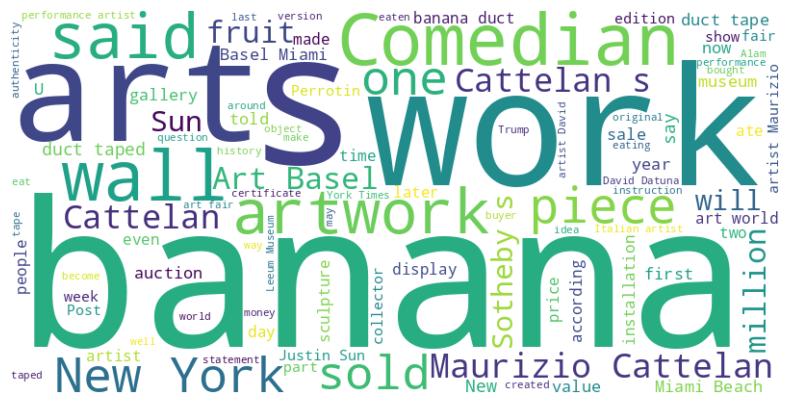

In [114]:
#@title content
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=STOPWORDS,
    colormap='viridis',
    max_words=100
).generate(all_content)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

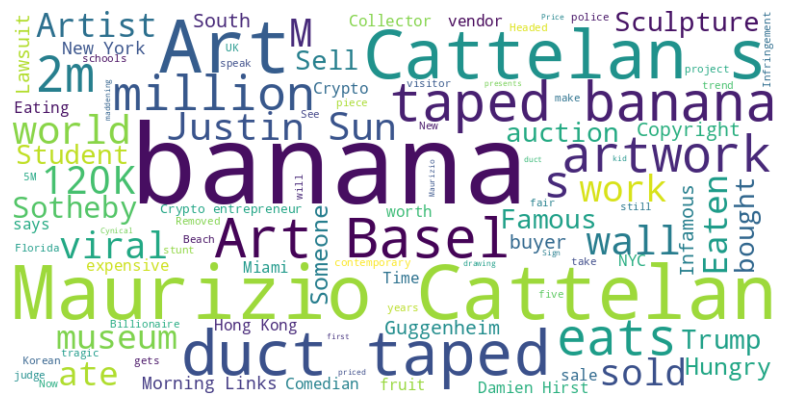

In [115]:
#@title title
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=STOPWORDS,
    colormap='viridis',
    max_words=100
).generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

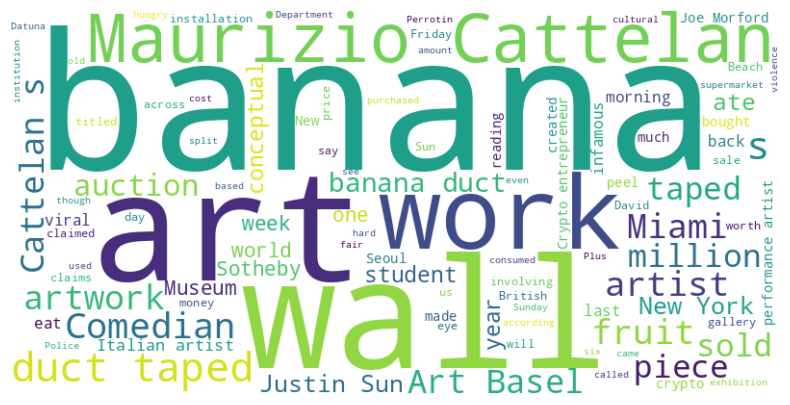

In [116]:
#@title comments
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=STOPWORDS,
    colormap='viridis',
    max_words=100
).generate(all_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()